In [33]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv("Website's traffic/website_wata.csv")

In [45]:
print(df.head())

   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0  


In [47]:
# Data structure and types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB
None


In [49]:
# Breakdown of traffic sources
source=df['Traffic Source'].value_counts()
print(source)

Traffic Source
Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: count, dtype: int64


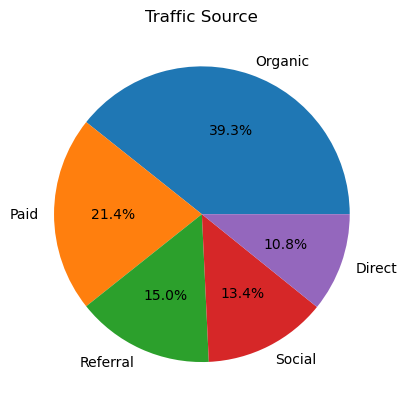

In [59]:
# Pie chart of traffic sources
source.plot(kind='pie', autopct= '%.1F%%')
plt.ylabel(None)
plt.title('Traffic Source')
plt.show()



In [ ]:
# Explore how each traffic source contributes to the conversion rate 
# and bounce rate, helping us identify which source is more valuable

In [61]:
traffic_conversion= df.groupby('Traffic Source').agg({
    'Conversion Rate': 'mean',
    'Bounce Rate': 'mean'})
print(traffic_conversion.head())


                Conversion Rate  Bounce Rate
Traffic Source                              
Direct                 0.978679     0.284581
Organic                0.982282     0.281821
Paid                   0.979009     0.296026
Referral               0.987727     0.266305
Social                 0.982679     0.296265


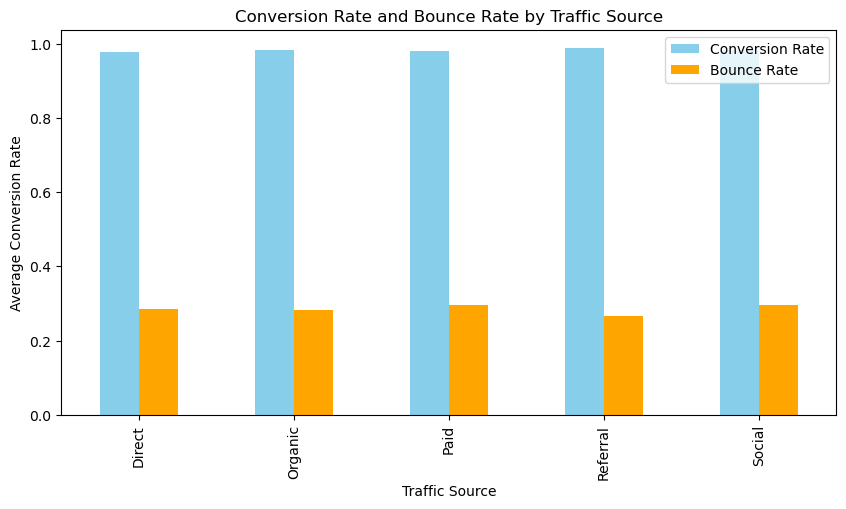

In [63]:
# Bar chart to visualize conversion and bounce rate across traffic sources
traffic_conversion.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'orange'])
plt.title('Conversion Rate and Bounce Rate by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Conversion Rate')
plt.show()


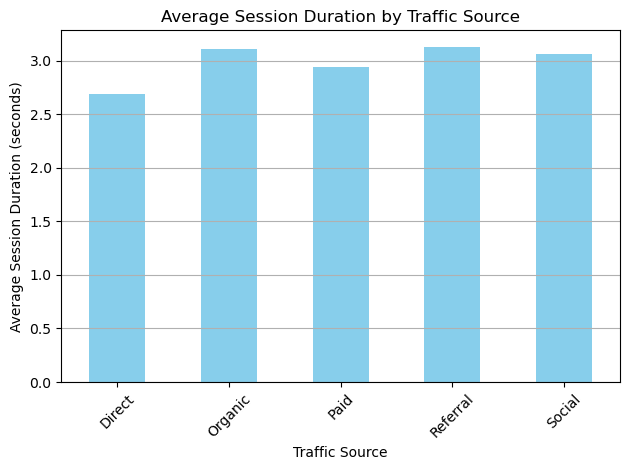

In [69]:
# Plotting session duration  # Grouping the data by Traffic Source and calculating the average session duration
session_duration_by_source = df.groupby('Traffic Source')['Session Duration'].mean()

# Plotting the average session duration by traffic source
session_duration_by_source.plot(kind='bar', color='skyblue')
plt.title('Average Session Duration by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Session Duration (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


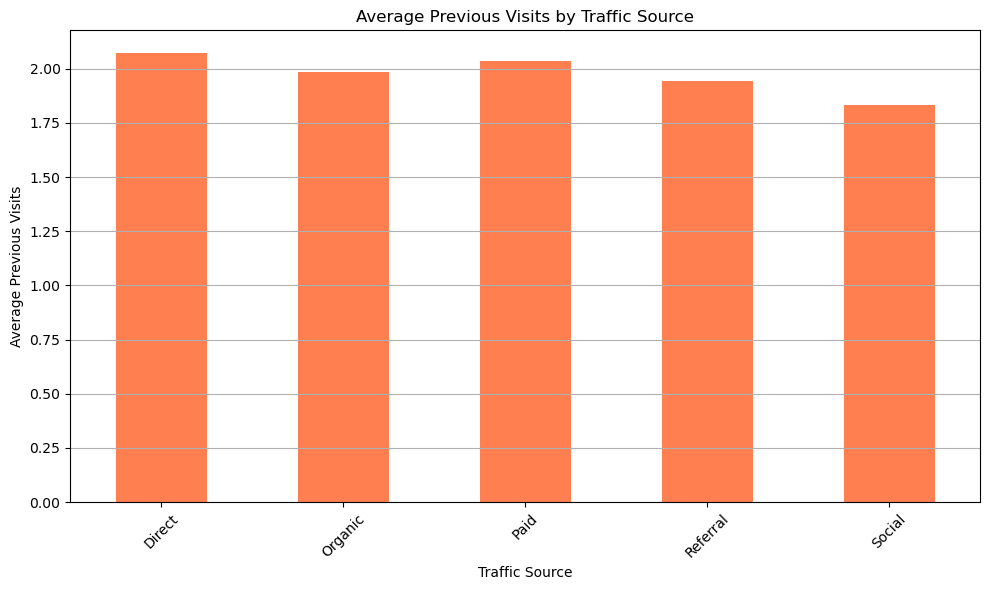

In [83]:
# Analyze previous visits by traffic source
# Grouping the data by Traffic Source and calculating the average number of previous visits
previous_visits_by_source = df.groupby('Traffic Source')['Previous Visits'].mean()

# Plotting the average previous visits by traffic source
plt.figure(figsize=(10, 6))
previous_visits_by_source.plot(kind='bar', color='skyblue')
plt.title('Average Previous Visits by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Previous Visits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


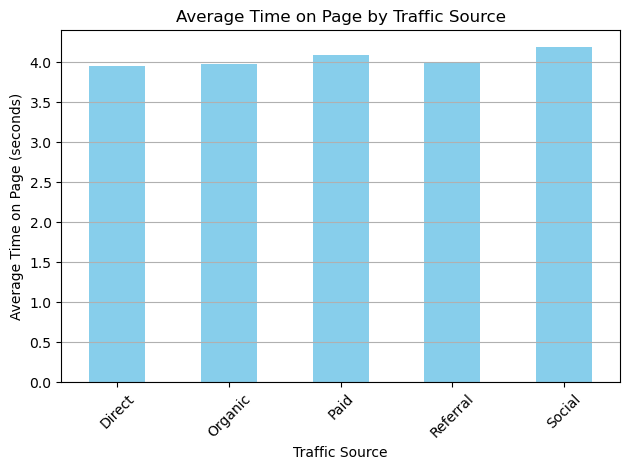

In [73]:
# Analyze time on page by traffic source
# Grouping the data by Traffic Source and calculating the average time on page
time_on_page_by_source = df.groupby('Traffic Source')['Time on Page'].mean()

# Plotting the average time on page by traffic source
time_on_page_by_source.plot(kind='bar', color='skyblue')
plt.title('Average Time on Page by Traffic Source')
plt.xlabel('Traffic Source')
plt.ylabel('Average Time on Page (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



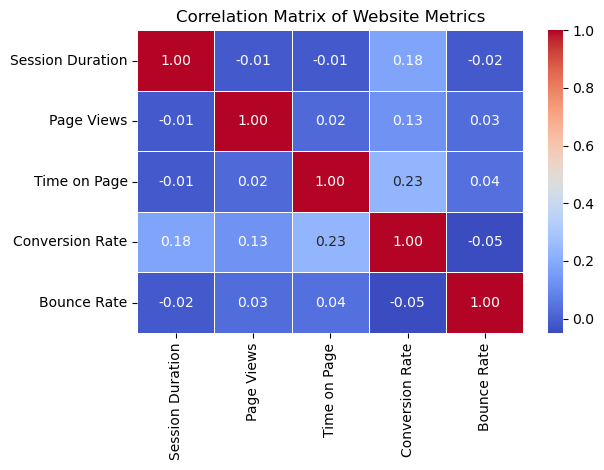

In [93]:
# Now let's explore the correlations between key numerical metrics
# Select the relevant numerical columns for correlation analysis
numeric_columns = ['Session Duration', 'Page Views', 'Time on Page', 'Conversion Rate', 'Bounce Rate']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Website Metrics')
plt.tight_layout()
plt.show()